In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [85]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [86]:
data_url ="http://covidtracking.com/api/states/daily.csv"
cor= pd.read_csv(data_url, parse_dates=['date'])
cor.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2021-03-07,AK,56886.0,NaN,NaN,NaN,totalTestsViral,1731628.0,33.0,1293.0,...,NaN,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,NaN
1,2021-03-07,AL,499819.0,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788.0,494.0,45976.0,...,NaN,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,NaN
2,2021-03-07,AR,324818.0,69092.0,2480716.0,NaN,totalTestsViral,2736442.0,335.0,14926.0,...,NaN,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,NaN
3,2021-03-07,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,NaN,0,0,96d23f888c995b9a7f3b4b864de6414f45c728ff,0,0,0,0,0,NaN
4,2021-03-07,AZ,826454.0,56519.0,3073010.0,NaN,totalTestsViral,7908105.0,963.0,57907.0,...,NaN,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,NaN


In [87]:
cor_tx = cor.query("state=='TX'")
cor_tx.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
47,2021-03-07,TX,2686818.0,365961.0,NaN,NaN,totalTestsViral,19907384.0,4721.0,NaN,...,NaN,84,0,3fcdc4c2d3b36a167a791fa8677cf5d19ca67464,0,0,0,0,0,NaN
103,2021-03-06,TX,2683865.0,365343.0,NaN,NaN,totalTestsViral,19831344.0,4921.0,NaN,...,NaN,233,0,6be43b228d92cd0a7b928066d777c7ed45f8b8cf,0,0,0,0,0,NaN
159,2021-03-05,TX,2678295.0,364108.0,NaN,NaN,totalTestsViral,19820052.0,5065.0,NaN,...,NaN,256,0,5269b5325eb28e1fdacd17f2e31677af30b83874,0,0,0,0,0,NaN
215,2021-03-04,TX,2671442.0,362318.0,NaN,NaN,totalTestsViral,19764177.0,5263.0,NaN,...,NaN,315,0,8e71c02df035870db42a3cd7a8dd62d52209ce81,0,0,0,0,0,NaN
271,2021-03-03,TX,2663414.0,359333.0,NaN,NaN,totalTestsViral,19707655.0,5508.0,NaN,...,NaN,297,0,2b74dc8a7a6f77a8244ed89e85d1f6658ce68bcf,0,0,0,0,0,NaN


In [88]:
cor_tx[['date', 'positiveIncrease']].head()

,date,positiveIncrease
47,2021-03-07,2953
103,2021-03-06,5570
159,2021-03-05,6853
215,2021-03-04,8028
271,2021-03-03,7822


In [89]:
cor_tx['cases_7day_ave'] = cor_tx.positiveIncrease.rolling(7).mean().shift(-3)
cor_tx[['date', 'positiveIncrease','cases_7day_ave']].head()

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,positiveIncrease,cases_7day_ave
47,2021-03-07,2953,NaN
103,2021-03-06,5570,NaN
159,2021-03-05,6853,NaN
215,2021-03-04,8028,6113.428571
271,2021-03-03,7822,6236.571429


In [90]:
sns.set_context("talk")

plt.figure(figsize=(20,12))

# The time series of daily cases using seaborn plot..
dates = pd.date_range("3 1 2020", periods=365, freq="D")

sns.lineplot(x="date",y="positiveIncrease",
             label="Daily Cases", 
             data=cor_tx,
             ci=None)
# Plotting the 7 day moving average... 
#sns.lineplot(x="date",y="cases_7day_ave",
 #            label="7 day MA",
  #           data=cor_tx,
   #          ci=None)

plt.xlabel("Date", size=24)
plt.ylabel("Daily New Cases", size=24)

NameError: name 'sns' is not defined

In [91]:
sns.set_context("talk")

plt.figure(figsize=(30,12))

# The time series of daily cases using seaborn plot..

sns.lineplot(x="date",y="positiveIncrease",
             label="Daily Cases", 
             data=cor_tx,
             ci=None)
# Plotting the 7 day moving average... 
sns.lineplot(x="date",y="cases_7day_ave",
             label="7 day MA",
             data=cor_tx,
             ci=None)

plt.xlabel("Date", size=24)
plt.ylabel("Daily New Cases", size=24)

NameError: name 'sns' is not defined

In [29]:
df = pd.read_excel(r'D:\texas_tr.xlsx')

In [30]:
df.head()

,County Name,Anderson,Andrews,Angelina,Aransas,Archer,Armstrong,Atascosa,Austin,Bailey,...,Young,Zapata,Zavala,Total,Perday,SN,Date,Case counts do not include probable cases,"County-level case counts were not available on March 7, March 8, and March 14.",Additional information can be found on the Data Notes page: https://dshs.texas.gov/coronavirus/datanotes.aspx.
0,Cases 03-04-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2020-03-04,NaN,NaN,NaN
1,Cases 03-05-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2020-03-05,NaN,NaN,NaN
2,Cases 03-06-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,5,5,3,2020-03-06,NaN,NaN,NaN
3,Cases 03-07-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,2020-03-07,NaN,NaN,NaN
4,Cases 03-08-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,2020-03-08,NaN,NaN,NaN


In [31]:
df1 = pd.DataFrame(df, 
                columns =['Total', 
                         'Perday', 'SN','Date'])

In [32]:
df1

,Total,Perday,SN,Date
0,0,0,1,2020-03-04
1,0,0,2,2020-03-05
2,5,5,3,2020-03-06
3,0,0,4,2020-03-07
4,0,0,5,2020-03-08
...,...,...,...,...
388,2384271,2412,389,2021-03-27
389,2386312,2041,390,2021-03-28
390,2388650,2338,391,2021-03-29
391,2391860,3210,392,2021-03-30


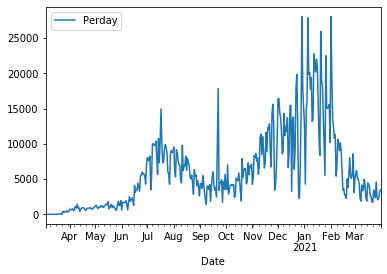

<Figure size 2160x1368 with 0 Axes>

In [68]:
df1.plot(x='Date', y=['Perday'])
plt.figure(figsize=(30,19))
plt.show()

In [58]:
march = df1.iloc[0:42]

In [59]:
march

,Total,Perday,SN,Date
0,0,0,1,2020-03-04
1,0,0,2,2020-03-05
2,5,5,3,2020-03-06
3,0,0,4,2020-03-07
4,0,0,5,2020-03-08
5,12,7,6,2020-03-09
6,15,3,7,2020-03-10
7,18,3,8,2020-03-11
8,22,4,9,2020-03-12
9,22,0,10,2020-03-13


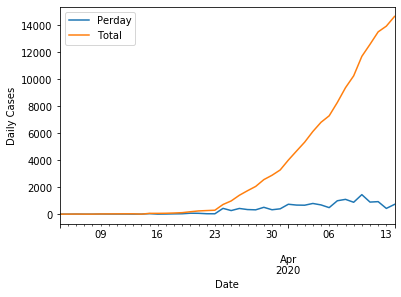

In [60]:
march.plot(x="Date", y=["Perday", "Total"])
plt.ylabel('Daily Cases')
plt.show()

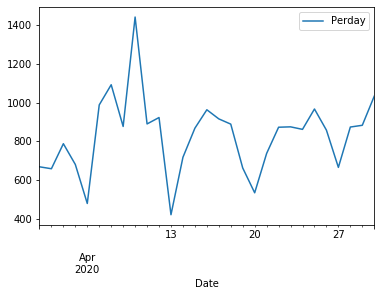

In [54]:
april.plot(x="Date", y=["Perday"])
plt.show()

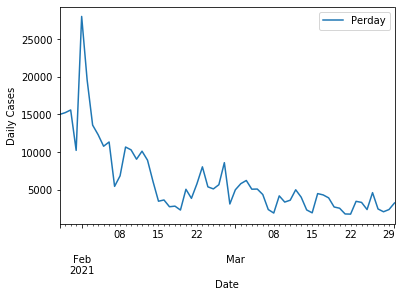

In [83]:
vaccination.plot(x="Date", y=["Perday"])
plt.ylabel('Daily Cases')
plt.show()

In [61]:
april = df1.iloc[29:58]
april

,Total,Perday,SN,Date
29,4665,669,30,2020-04-02
30,5324,659,31,2020-04-03
31,6112,788,32,2020-04-04
32,6793,681,33,2020-04-05
33,7273,480,34,2020-04-06
34,8261,988,35,2020-04-07
35,9353,1092,36,2020-04-08
36,10230,877,37,2020-04-09
37,11671,1441,38,2020-04-10
38,12561,890,39,2020-04-11


In [81]:
vaccination = df1.iloc[330:-1]


In [82]:
vaccination

,Total,Perday,SN,Date,cases_7day_ave
330,2018127,14992,331,2021-01-28,2.016620e+06
331,2033353,15226,332,2021-01-29,2.033989e+06
332,2048935,15582,333,2021-01-30,2.050942e+06
333,2059143,10208,334,2021-01-31,2.067679e+06
334,2087170,28027,335,2021-02-01,2.084032e+06
...,...,...,...,...,...
387,2381859,4584,388,2021-03-26,2.380708e+06
388,2384271,2412,389,2021-03-27,2.383595e+06
389,2386312,2041,390,2021-03-28,2.386506e+06
390,2388650,2338,391,2021-03-29,NaN


In [70]:
df1['cases_7day_ave'] = df1.Total.rolling(7).mean().shift(-3)
df1[['Date', 'Total','cases_7day_ave']].head()

,Date,Total,cases_7day_ave
0,2020-03-04,0,NaN
1,2020-03-05,0,NaN
2,2020-03-06,5,NaN
3,2020-03-07,0,4.571429
4,2020-03-08,0,7.142857


In [80]:
df1.cases_7day_ave

0               NaN
1               NaN
2               NaN
3      4.571429e+00
4      7.142857e+00
           ...     
388    2.383595e+06
389    2.386506e+06
390             NaN
391             NaN
392             NaN
Name: cases_7day_ave, Length: 393, dtype: float64

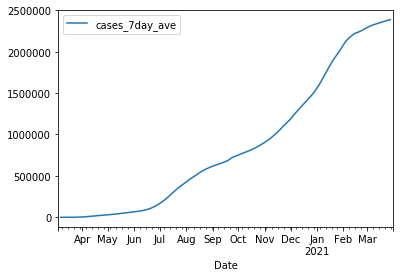

In [76]:
df1.plot(x="Date",y=["cases_7day_ave"])
plt.show()